<a href="https://colab.research.google.com/github/AkhilPadma/Network_threat_analysis/blob/main/Network_Threat_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn


In [2]:
from pathlib import Path
import pandas as pd

file_path = Path("/content/internet_firewall_data.csv")
df = pd.read_csv(file_path)
df.head(5)


,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [3]:
df.tail(5)


,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,drop,70,70,0,1,0,1,0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0
65531,54867,445,0,0,drop,70,70,0,1,0,1,0


In [4]:
df.sample(5)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
23900,46434,443,35412,443,allow,14879,4981,9898,43,121,21,22
11658,49773,53,20298,53,allow,994,86,908,2,30,1,1
7419,58638,5900,0,0,deny,62,62,0,1,0,1,0
22852,50218,445,0,0,drop,70,70,0,1,0,1,0
7328,58638,5900,0,0,deny,62,62,0,1,0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [6]:
df.shape

(65532, 12)

In [7]:
df['Action'].value_counts()

,count
Action,
allow,37640
deny,14987
drop,12851
reset-both,54


In [8]:

df[df['Action'] == 'reset-both'].sample(10)


,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
49805,6889,45850,0,0,reset-both,143,143,0,1,0,1,0
39410,12604,3389,12604,3389,reset-both,293,223,70,4,1,3,1
29613,23461,34021,0,0,reset-both,62,62,0,1,0,1,0
28396,18252,18242,0,0,reset-both,62,62,0,1,0,1,0
39029,22285,3389,22285,3389,reset-both,293,223,70,4,0,3,1
30044,29136,31652,0,0,reset-both,145,145,0,1,0,1,0
30988,48903,25773,0,0,reset-both,157,157,0,1,0,1,0
39028,17800,3389,17800,3389,reset-both,293,223,70,4,0,3,1
21928,60419,61248,0,0,reset-both,145,145,0,1,0,1,0
38265,13968,29376,0,0,reset-both,62,62,0,1,0,1,0


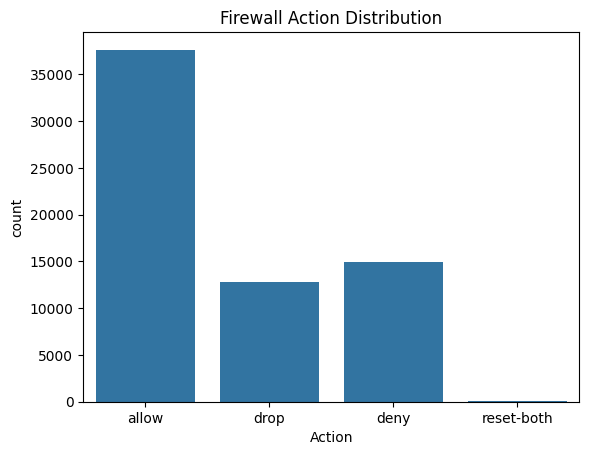

In [9]:
import seaborn as sns

sns.countplot(x='Action', data=df)
plt.title("Firewall Action Distribution")
plt.show()


**Action has 4 categories allow drop deny reset-both**

***Intrusion Detection : it basically means unauthorized access or malcoious activity with in a network or sytem that bypasses the firewalls security***

> Categorical Features : Source Port,Destination Port	,NAT Source Port	NAT Destination Port	,Action.

>Numerical Features : Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received.





# **considering:**

#**Allow -0**
# **deny/drop/reset-both -1**


In [10]:
df['is_intrusion'] = df['Action'].apply(lambda x: 1 if x in ['drop', 'deny', 'reset-both'] else 0)
df['is_intrusion'].sample(10)

,is_intrusion
65500,0
12180,0
59888,1
20952,0
39727,0
58469,0
52030,1
44727,1
36595,1
14370,1


In [11]:
df.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Action', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received', 'is_intrusion'],
      dtype='object')

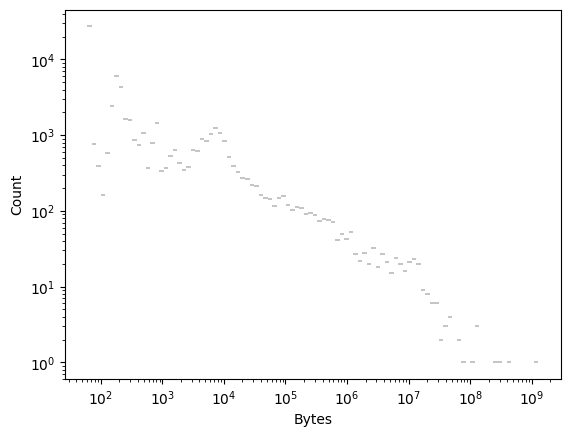

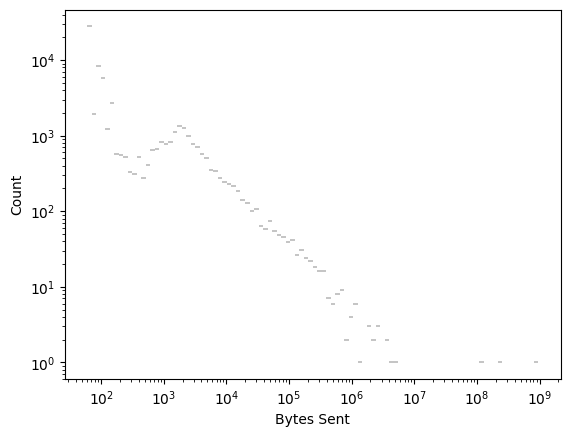

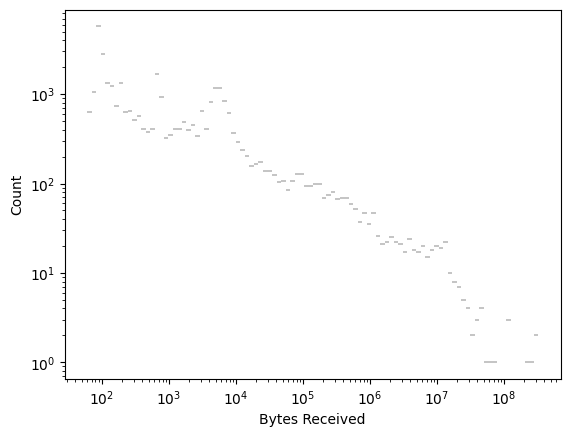

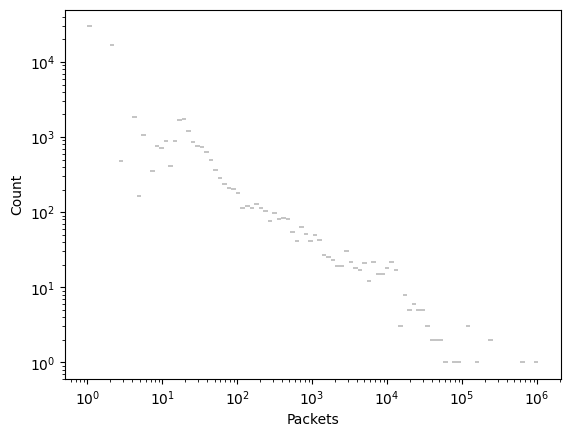

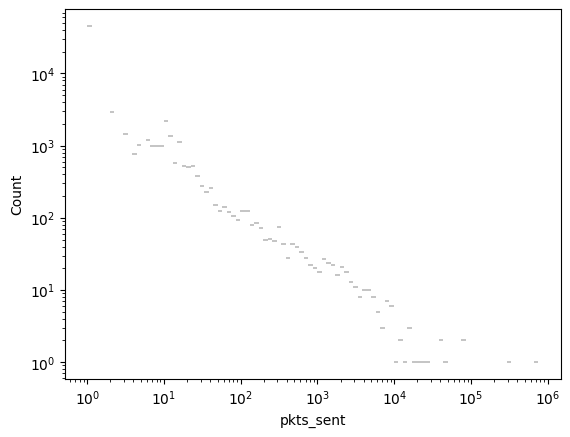

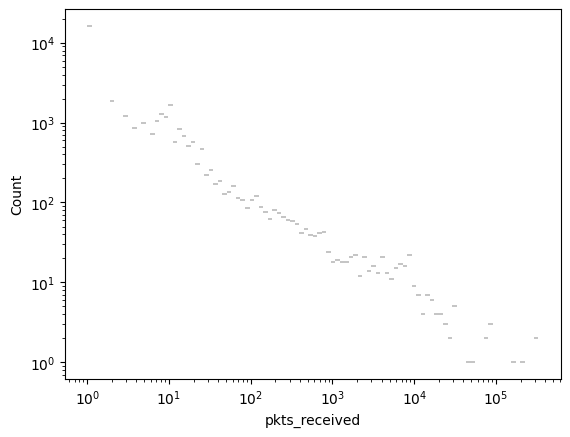

In [12]:
for cols in ['Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'pkts_sent',
       'pkts_received'] :
       sns.histplot(df[cols],bins =100,log_scale=(True,True))
       plt.show()

>here we are checking how often each value occurs

>here we can see in case bytes most of the values lie in the range of 10^2 - 10^4 and then 10^4 - 10^6 and very less values in the range of 10^6-10^8

>This is important before feeding features into ML models.



<Axes: xlabel='is_intrusion', ylabel='Destination Port'>

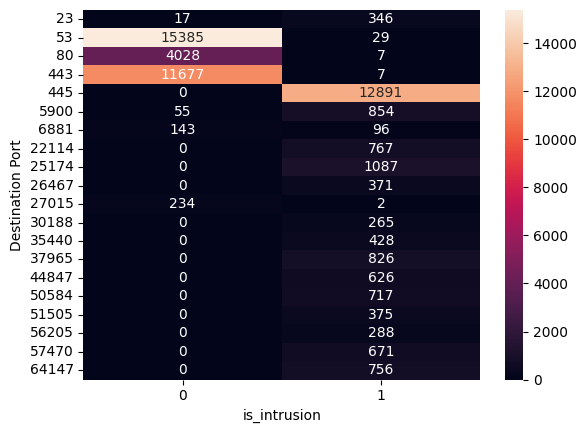

In [13]:
top_ports = df['Destination Port'].value_counts().head(20).index #visualizing top 20 destination ports based on the count
pivot = pd.pivot_table(df[df['Destination Port'].isin(top_ports)],
                       index='Destination Port', columns='is_intrusion',
                       values='Bytes', aggfunc='count')
sns.heatmap(pivot.fillna(0), annot=True, fmt='g')


In [14]:
# Define suspicious destination ports commonly associated with attacks
suspicious_ports = [3389, 22, 23, 445]

# Compute justified scores based on behavioral rules
df['justified_score'] = (
    2 * (df['Action'].str.lower().isin(['deny', 'drop','reset_both'])) +
    2 * (df['Destination Port'].isin(suspicious_ports)) +
    1 * (df['pkts_received'] == 0) +
    3 * ((df['Elapsed Time (sec)'] == 0) & (df['Bytes'] > 0)) +
    2 * ((df['Bytes Received'] == 0) & (df['Bytes Sent'] > 0)) +
    1 * (df['Packets'] <= 1)
)

# Label as intrusion if score >= 4
df['is_intrusion'] = df['justified_score'] >= 4

df.sample(10)


,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,is_intrusion,justified_score
18884,65106,53,42197,53,allow,193,102,91,2,30,1,1,False,0
54419,64087,50265,0,0,deny,145,145,0,1,0,1,0,True,9
26070,56676,53,4759,53,allow,172,88,84,2,31,1,1,False,0
29103,64900,445,0,0,drop,70,70,0,1,0,1,0,True,11
3181,52223,11979,36766,11979,allow,70,70,0,2,9,2,0,False,3
59794,56680,8100,35918,8100,allow,78,78,0,1,5,1,0,True,4
11738,56484,80,16261,80,allow,97842,4441,93401,109,135,41,68,False,0
45661,55479,53,40449,53,allow,184,94,90,2,31,1,1,False,0
43705,27005,27011,25017,27011,allow,1622,126,1496,4,31,2,2,False,0
17301,52077,51638,13368,51638,allow,70,70,0,2,8,2,0,False,3


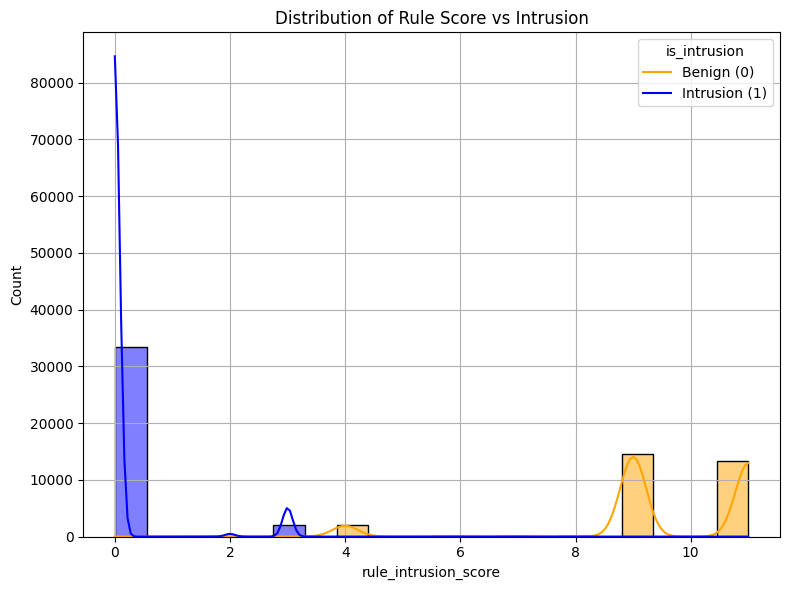

In [15]:
df['rule_intrusion_score'] = df['justified_score']
df['is_intrusion_label'] = df['is_intrusion'].astype(int)

plt.figure(figsize=(8, 6))
sns.histplot(
    data=df,
    x='rule_intrusion_score',
    hue='is_intrusion_label',
    bins=20,
    kde=True,
    palette={0: 'blue', 1: 'orange'},
    alpha=0.5
)

plt.title('Distribution of Rule Score vs Intrusion')
plt.xlabel('rule_intrusion_score')
plt.ylabel('Count')
plt.legend(title='is_intrusion', labels=['Benign (0)', 'Intrusion (1)'])
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

for threshold in range(df['justified_score'].min(), df['justified_score'].max() + 1):
    preds = df['justified_score'] >= threshold
    precision = precision_score(df['is_intrusion'], preds)
    recall = recall_score(df['is_intrusion'], preds)
    f1 = f1_score(df['is_intrusion'], preds)
    print(f"Threshold {threshold}: Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}")


Threshold 0: Precision=0.456, Recall=1.000, F1=0.627
Threshold 1: Precision=0.931, Recall=1.000, F1=0.965
Threshold 2: Precision=0.931, Recall=1.000, F1=0.965
Threshold 3: Precision=0.937, Recall=1.000, F1=0.967
Threshold 4: Precision=1.000, Recall=1.000, F1=1.000
Threshold 5: Precision=1.000, Recall=0.934, F1=0.966
Threshold 6: Precision=1.000, Recall=0.934, F1=0.966
Threshold 7: Precision=1.000, Recall=0.932, F1=0.965
Threshold 8: Precision=1.000, Recall=0.930, F1=0.964
Threshold 9: Precision=1.000, Recall=0.930, F1=0.964
Threshold 10: Precision=1.000, Recall=0.446, F1=0.617
Threshold 11: Precision=1.000, Recall=0.446, F1=0.617


so by above we can decide our threshold can be 4 and the also we can see from graph after 4 there is clear separation

# **Malware detection**


| Pattern                                          | Why It’s Suspicious         |
| ------------------------------------------------ | --------------------------- |
| **Allow + Very short Elapsed Time + High Bytes** | Sudden data upload/download |
| **Unusual port** + **High packets**              | Hidden communication        |
| **Same Source Port & Dest Port (loopback)**      | Port hijack, VPN tunneling  |


Allow + Very Short Time + High Bytes + High Packets

In [17]:
df['malware_rule_1'] = ((df['Action'] == 'allow') &
                      (df['Bytes'] > 10000) &
                      (df['Elapsed Time (sec)'] < 1) &
                      (df['pkts_sent'] > 10)).astype(int)


Unusual Port + High Packets Sent




In [18]:
common_ports = df['Destination Port'].value_counts().head(20).index.tolist()
df['unusual_port'] = ~df['Destination Port'].isin(common_ports)
df['malware_rule_2'] = ((df['unusual_port']) &
                        (df['pkts_sent'] > 15)).astype(int)


Same Source and Destination Port (Loopback)

In [19]:
df['malware_rule_3'] = (df['Source Port'] == df['Destination Port']).astype(int)


In [20]:
df['malware_like'] = ((df['malware_rule_1'] == 1) |
                      (df['malware_rule_2'] == 1) |
                      (df['malware_rule_3'] == 1)).astype(int)


In [21]:
df.sample(5)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),...,pkts_received,is_intrusion,justified_score,rule_intrusion_score,is_intrusion_label,malware_rule_1,unusual_port,malware_rule_2,malware_rule_3,malware_like
11707,1294,53,1294,53,allow,216,82,134,2,32,...,1,False,0,0,0,0,False,0,0,0
44080,60830,445,0,0,drop,70,70,0,1,0,...,0,True,11,11,1,0,False,0,0,0
56779,52328,445,0,0,drop,70,70,0,1,0,...,0,True,11,11,1,0,False,0,0,0
40905,27005,1307,27385,1307,allow,857,126,731,2,30,...,1,False,0,0,0,0,True,0,0,0
33965,50537,80,34758,80,allow,4186,3559,627,15,31,...,7,False,0,0,0,0,False,0,0,0


# **Traffic Spike**

Since we don't have timestamps in dataset we are assuming index order is time

In [22]:
df = df.reset_index(drop=True)
df['timestamp'] = pd.date_range(start='2023-01-01', periods=len(df), freq='10S')
df['time_block'] = df.index // 500    # One block = 500 rows
                                      # we will get time stamps ranging from 0 - 131

/tmp/ipython-input-22-514257743.py:2: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['timestamp'] = pd.date_range(start='2023-01-01', periods=len(df), freq='10S')


In [23]:
block_traffic = df.groupby(['Source Port', 'time_block'])['Bytes'].sum().reset_index() #Summarize Bytes per Source Port in each time block
block_traffic

,Source Port,time_block,Bytes
0,0,2,1192
1,0,5,124
2,0,6,480
3,0,7,134
4,0,11,244
...,...,...,...
58627,65532,77,255
58628,65532,116,1015
58629,65533,13,277
58630,65533,16,66


In [24]:

# Get historical average and std for each Source Port
port_avg = block_traffic.groupby('Source Port')['Bytes'].mean().rename('avg_bytes')
port_std = block_traffic.groupby('Source Port')['Bytes'].std().rename('std_bytes')

# Merge into traffic block data
block_traffic = block_traffic.merge(port_avg, on='Source Port')
block_traffic = block_traffic.merge(port_std, on='Source Port')


In [25]:
block_traffic['is_spike'] = (block_traffic['Bytes'] > block_traffic['avg_bytes'] + 2 * block_traffic['std_bytes']).astype(int)

In [26]:
df['is_spike'] = 0

# Mark rows that belong to spiking Source Ports in those time blocks
for _, row in block_traffic[block_traffic['is_spike'] == 1].iterrows():
    cond = (df['Source Port'] == row['Source Port']) & (df['time_block'] == row['time_block'])
    df.loc[cond, 'is_spike'] = 1


In [27]:
df.head(5)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),...,rule_intrusion_score,is_intrusion_label,malware_rule_1,unusual_port,malware_rule_2,malware_rule_3,malware_like,timestamp,time_block,is_spike
0,57222,53,54587,53,allow,177,94,83,2,30,...,0,0,0,False,0,0,0,2023-01-01 00:00:00,0,0
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,...,2,0,0,True,0,0,0,2023-01-01 00:00:10,0,0
2,6881,50321,43265,50321,allow,238,118,120,2,1199,...,0,0,0,True,0,0,0,2023-01-01 00:00:20,0,0
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,...,2,0,0,True,0,0,0,2023-01-01 00:00:30,0,0
4,50002,443,45848,443,allow,25358,6778,18580,31,16,...,0,0,0,False,0,0,0,2023-01-01 00:00:40,0,1


# **Uncommon IPs :**

In [28]:
ip_counts = df['Source Port'].value_counts()


In [29]:
rare_ips = ip_counts[ip_counts < 5].index.tolist()


In [30]:
df['rare_ip'] = df['Source Port'].isin(rare_ips).astype(int)


Network Threat Analysis

In [31]:
df['threat_flag'] = (
    df['is_intrusion'] |
    df.get('malware_like', 0) |
    df.get('is_spike', 0) |
    df.get('rare_ip', 0)
).astype(int)


In [32]:
features = [
    'Bytes', 'Bytes Sent', 'Bytes Received',
    'pkts_sent', 'pkts_received', 'Elapsed Time (sec)',]

In [33]:
# Action
action_dummies = pd.get_dummies(df['Action'], drop_first=True)  # Drops 'allow'

# Combine with numerical
X = pd.concat([df[features], action_dummies], axis=1)


In [34]:
X = df[features]
y = df['threat_flag']

In [35]:
from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample(X, y)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

So intially I did it without sampling so i found is_threat = 0 were falling in minority cases so i applied SMOTE(oversampling method)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    results[name] = {
        "model": model,
        "y_pred": y_pred
    }



Model: Random Forest
[[9158  794]
 [1421 8531]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      9952
           1       0.91      0.86      0.89      9952

    accuracy                           0.89     19904
   macro avg       0.89      0.89      0.89     19904
weighted avg       0.89      0.89      0.89     19904


Model: Logistic Regression
[[1258 8694]
 [1088 8864]]
              precision    recall  f1-score   support

           0       0.54      0.13      0.20      9952
           1       0.50      0.89      0.64      9952

    accuracy                           0.51     19904
   macro avg       0.52      0.51      0.42     19904
weighted avg       0.52      0.51      0.42     19904


Model: SVM
[[9059  893]
 [3161 6791]]
              precision    recall  f1-score   support

           0       0.74      0.91      0.82      9952
           1       0.88      0.68      0.77      9952

    accuracy                           

Among the classifiers applied random forest gave us the best result after the using oversampling method

In [38]:
if "Random Forest" in results:
    rf_model = results["Random Forest"]["model"]
    rf_y_pred = results["Random Forest"]["y_pred"]
    print("\nRandom Forest Evaluation:")
    print(f"Accuracy: {accuracy_score(y_test, rf_y_pred):.3f}")
    print(f"Precision: {precision_score(y_test, rf_y_pred):.3f}")
    print(f"Recall: {recall_score(y_test, rf_y_pred):.3f}")
    print(f"F1 Score: {f1_score(y_test, rf_y_pred):.3f}")


Random Forest Evaluation:
Accuracy: 0.889
Precision: 0.915
Recall: 0.857
F1 Score: 0.885


In [39]:
import pandas as pd
from google.colab import files
df.to_csv('final_threat_dataset.csv', index=False)
files.download('final_threat_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

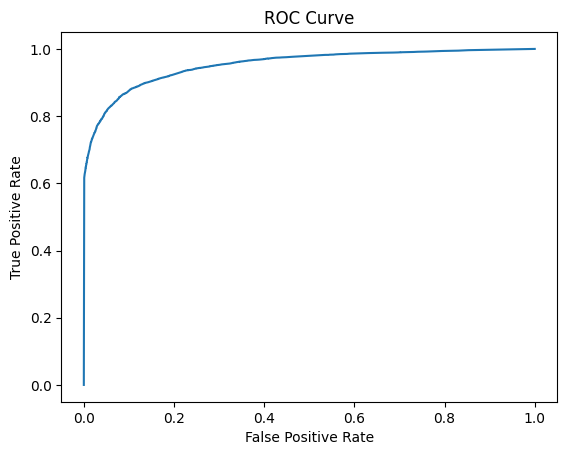

In [47]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")


In [49]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, probs)
print("AUC Score:", auc)

AUC Score: 0.9531187450970446


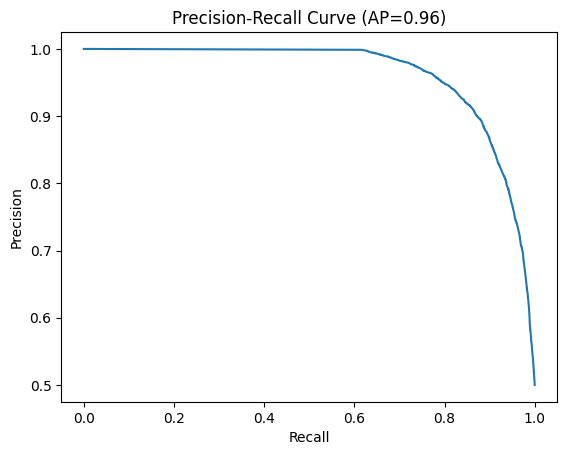

In [51]:
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, _ = precision_recall_curve(y_test, probs)
avg_precision = average_precision_score(y_test, probs)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve (AP={avg_precision:.2f})")
plt.show()